The Iris can be downloaded from UCI machine learning repository.
The dataset has 1050 training examples with four numerical features (sepal length, sepal width, petal length, petal width).

K-means clustering algorithm:
1. Initialize k clustercenters 
2. Repeat until converged:
    - assign data points to their nearest clusters
    - update cluster centers using mean of assigned datapoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

Before implementing k-means, let's have a look at the data:

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


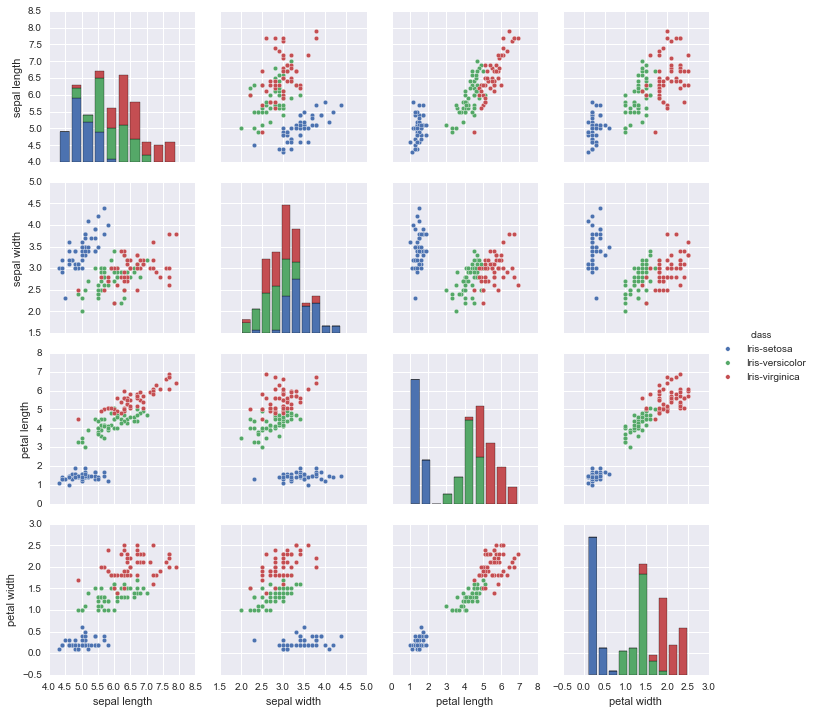

In [4]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'],  hue = 'class')

Since k-means clustering is a distance-based algorithm, we need to normalize the individual features:

In [5]:
scaler = StandardScaler()
df[['sepal length', 'sepal width', 'petal length', 'petal width']] = scaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']])

Convert relevant columns from Pandas dataframe to numpy array:

In [6]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']].values

Let's define some functions needed for k-means clustering algorithm:

In [7]:
def InitializeClusters(data, k):
    #input: data: numpy array with size (#samples, #featues)
    #input: k: integer
    #returns: clusters: array with size (k, #features)
    datapoints = data.shape[0]
    clusters = data[np.random.randint(0,datapoints, k), :]  #pick k random datapoints from data
    return clusters


In [8]:
def CalculateDistance(datapoint, clusters):
    #input: datapoint: 1-D numpy array with size (#features)
    #input: clusters: numpy array with size (k, #features)
    #returns: 1-D numpy array with size (k)
    #Euclidean distance
    return np.sqrt(np.sum((np.square(clusters-datapoint)), axis = 1)) #sum along all features in each datapoint axis = 1



In [9]:
def AssignToClosestCentroid(data, clusters):
    #input: data: numpy array with size (#samples, #featues)
    #input: clusters: numpy array with size (k, #features)
    #returns: labels: 1D numpy array with size (#samples) 
    labels = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        labels[i] = np.argmin(CalculateDistance(data[i, :], clusters))     #assign label to closest cluster
    return labels


In [10]:
def UpdateCentroids(data, labels, clusters):
    #input: data: numpy array with size (#samples, #featues)
    #input: clusters: numpy array with size (k, #features)
    #input: labels: 1D numpy array with size (#samples) 
    #returns clusters
    for i in range(clusters.shape[0]):  #loop through k cluster
        clusters[i] = np.mean(data[labels == i], axis = 0)   #calculate mean along all datapoints in cluster (axis=0)
    return clusters

Now we can define the main algorithm:

In [11]:
def kmeansclustering(data, k, iterations = 100):
    #input: data: numpy array with size (#samples, #featues)
    #input: k: integer (number of clusters)
    clusters = InitializeClusters(data, k)
    labels = AssignToClosestCentroid(data, clusters)
    for i in xrange(iterations):
        labels = AssignToClosestCentroid(data, clusters)
        clusters = UpdateCentroids(data, labels, clusters)
    return labels

Run k-means algorithm and add predicted labels to dataframe:

In [12]:
labels =  kmeansclustering(X, 3)   
df['predicted'] = labels

Plot results:

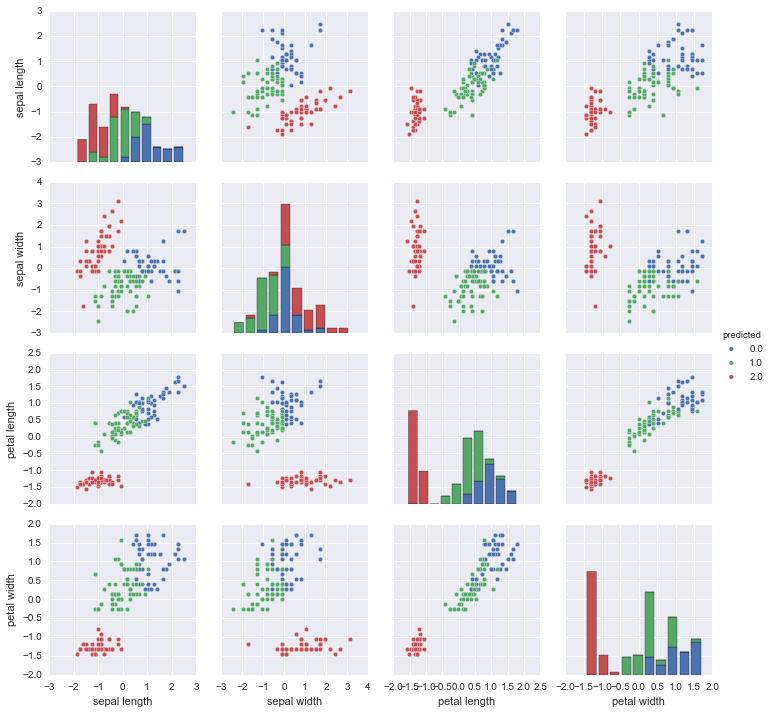

In [13]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'],  hue = 'predicted')

However, when running k-means clustering a couple of times, we see that the algorithm does not always converge to the same solution. For example, the cluster of Iris-Setosa is sometimes classified as two clusters, even though for a human it is obviously and easily distinguishable as a separate cluster. 